# Notes on Pytorch

* The forward function in feed-forward nn can be really complicated to account for numerous tasks to be executed by neural network. It is really simple in pytorch.

In [1]:
# pytorch is just numpy on a GPU
import torch

In [2]:
# tensor is a multi-dimensional array
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2, 5])
print(x.shape)
print(x)

torch.Size([2, 5])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [4]:
# reshape = view
y.view([1, 2])

tensor([[2., 1.]])

In [5]:
import torchvision
from torchvision import transforms, datasets

In [6]:
train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [7]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [9]:
x, y = data[0][0], data[1][0]

In [10]:
import matplotlib.pyplot as plt

In [11]:
# shape is 1x28x28 not 28 28 so modify to show the image
print(data[0][0].shape)

torch.Size([1, 28, 28])


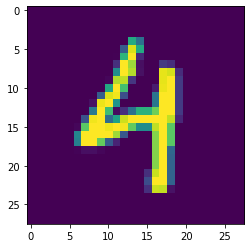

In [12]:
plt.imshow(data[0][0].view(28, 28))

In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# feed forward NN

class Net(nn.Module):
    def __init__(self):
        super().__init__() # very important
        inputNum = 28 * 28
        layersNum = 64
        outputNum = 10
        self.fc1 = nn.Linear(inputNum, layersNum)
        self.fc2 = nn.Linear(layersNum, layersNum)
        self.fc3 = nn.Linear(layersNum, layersNum)
        self.fc4 = nn.Linear(layersNum, outputNum)
        
    # this forward function can be a lot more complicated with conditional branches
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        # constrains to 1 digit to light up or probability distribution
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
X = torch.rand(28, 28)
X = X.view(-1, 28*28)
output = net(X)
output

tensor([[-2.3608, -2.2482, -2.3990, -2.2252, -2.3281, -2.2159, -2.4503, -2.1692,
         -2.2882, -2.3784]], grad_fn=<LogSoftmaxBackward>)

In [17]:
import torch.optim as optim

# TODO: need to decay the learning rate for more accurate models
optimiser = optim.Adam(net.parameters(), lr=0.001)

# full passes through dataset
EPOCHS = 3

# ignite library for this training loop
for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        # can use mean square error for 1 hot vector
        loss = F.nll_loss(output, y)
        # backpropogate
        loss.backward()
        # adjust weights
        optimiser.step()
    print(loss)
        
        

tensor(0.0456, grad_fn=<NllLossBackward>)
tensor(0.0044, grad_fn=<NllLossBackward>)
tensor(0.0070, grad_fn=<NllLossBackward>)


In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
        
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.98


In [35]:
index = 8

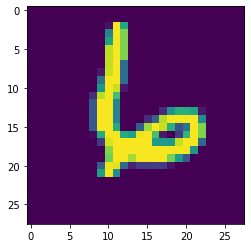

In [36]:
plt.imshow(X[index].view(28, 28))
plt.show()

In [37]:
# model just keeps predicting 6?
print(torch.argmax(net(X[index].view(-1, 28*28))[0]))

tensor(6)
